In [81]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# load preprocessed dataset
X_train = pd.read_csv("train_inputs.csv")
y_train = pd.read_csv("train_targets.csv")
X_test = pd.read_csv("test_inputs.csv")
y_test = pd.read_csv("test_targets.csv")


In [83]:
X_train.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NNW.2,NW.2,S.2,SE.2,SSE.2,SSW.2,SW.2,W.2,WNW.2,WSW.2
0,0,0.556604,0.542533,0.0,0.220183,0.579310,0.472868,0.345455,0.385965,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.429245,0.359168,1.0,0.220183,0.579310,0.341085,0.272727,0.491228,0.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.511792,0.570888,0.0,0.146789,0.606897,0.186047,0.109091,0.298246,0.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.379717,0.370510,0.0,0.183486,0.482759,0.682171,0.545455,0.614035,0.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.504717,0.510397,0.0,0.183486,0.544828,0.240310,0.272727,0.350877,0.69,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [84]:
X_train.drop(columns=X_train.columns[0], axis=1, inplace=True)
y_train.drop(columns=y_train.columns[0], axis=1, inplace=True)
X_test.drop(columns=X_test.columns[0], axis=1, inplace=True)
y_test.drop(columns=y_test.columns[0], axis=1, inplace=True)


In [85]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW.2,NW.2,S.2,SE.2,SSE.2,SSW.2,SW.2,W.2,WNW.2,WSW.2
0,0.556604,0.542533,0.0,0.220183,0.579310,0.472868,0.345455,0.385965,0.38,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.429245,0.359168,1.0,0.220183,0.579310,0.341085,0.272727,0.491228,0.91,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.511792,0.570888,0.0,0.146789,0.606897,0.186047,0.109091,0.298246,0.79,0.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.379717,0.370510,0.0,0.183486,0.482759,0.682171,0.545455,0.614035,0.52,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.504717,0.510397,0.0,0.183486,0.544828,0.240310,0.272727,0.350877,0.69,0.52,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [125]:
# train a decision tree model on the training set
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# fit the model
model.fit(X_train, y_train)

ipykernel_launcher:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(n_jobs=-1, random_state=42)

### Predict Result

In [126]:
y_pred_test = model.predict(X_test)
y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [127]:
# probability of getting output as 0 - no rain
model.predict_proba(X_test)

array([[0.17, 0.83],
       [0.76, 0.24],
       [1.  , 0.  ],
       ...,
       [0.94, 0.06],
       [0.98, 0.02],
       [0.95, 0.05]])

#### Check accuracy score

In [128]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8515


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

#### Compare the train-set and test-set accuracy
 Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [129]:
y_pred_train = model.predict(X_train)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Model accuracy score: 0.9999


#### Check for overfitting and underfitting 
     

In [130]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9999
Test set score: 0.8515


Once again, the training accuracy is almost 100%, but this time the test accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging.

In [131]:
y_test.value_counts() / len(y_test)

RainTomorrow
No              0.777032
Yes             0.222968
dtype: float64

We can can access individual decision trees using `model.estimators_`

In [135]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [132]:
from sklearn.tree import plot_tree, export_text

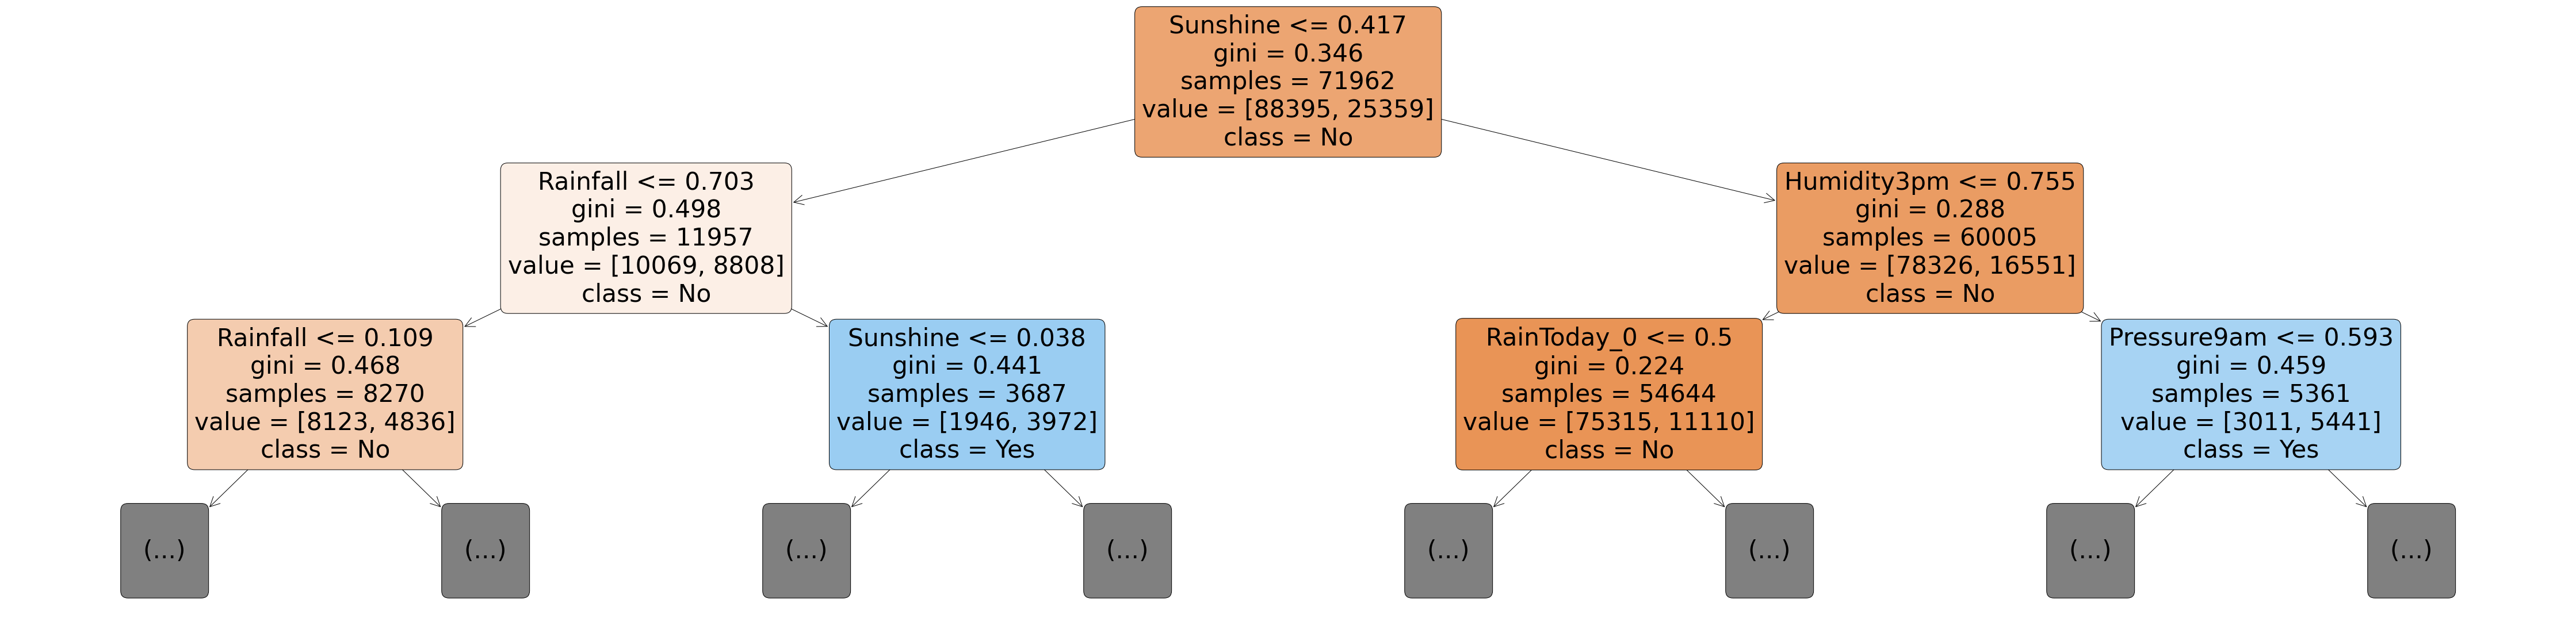

In [136]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

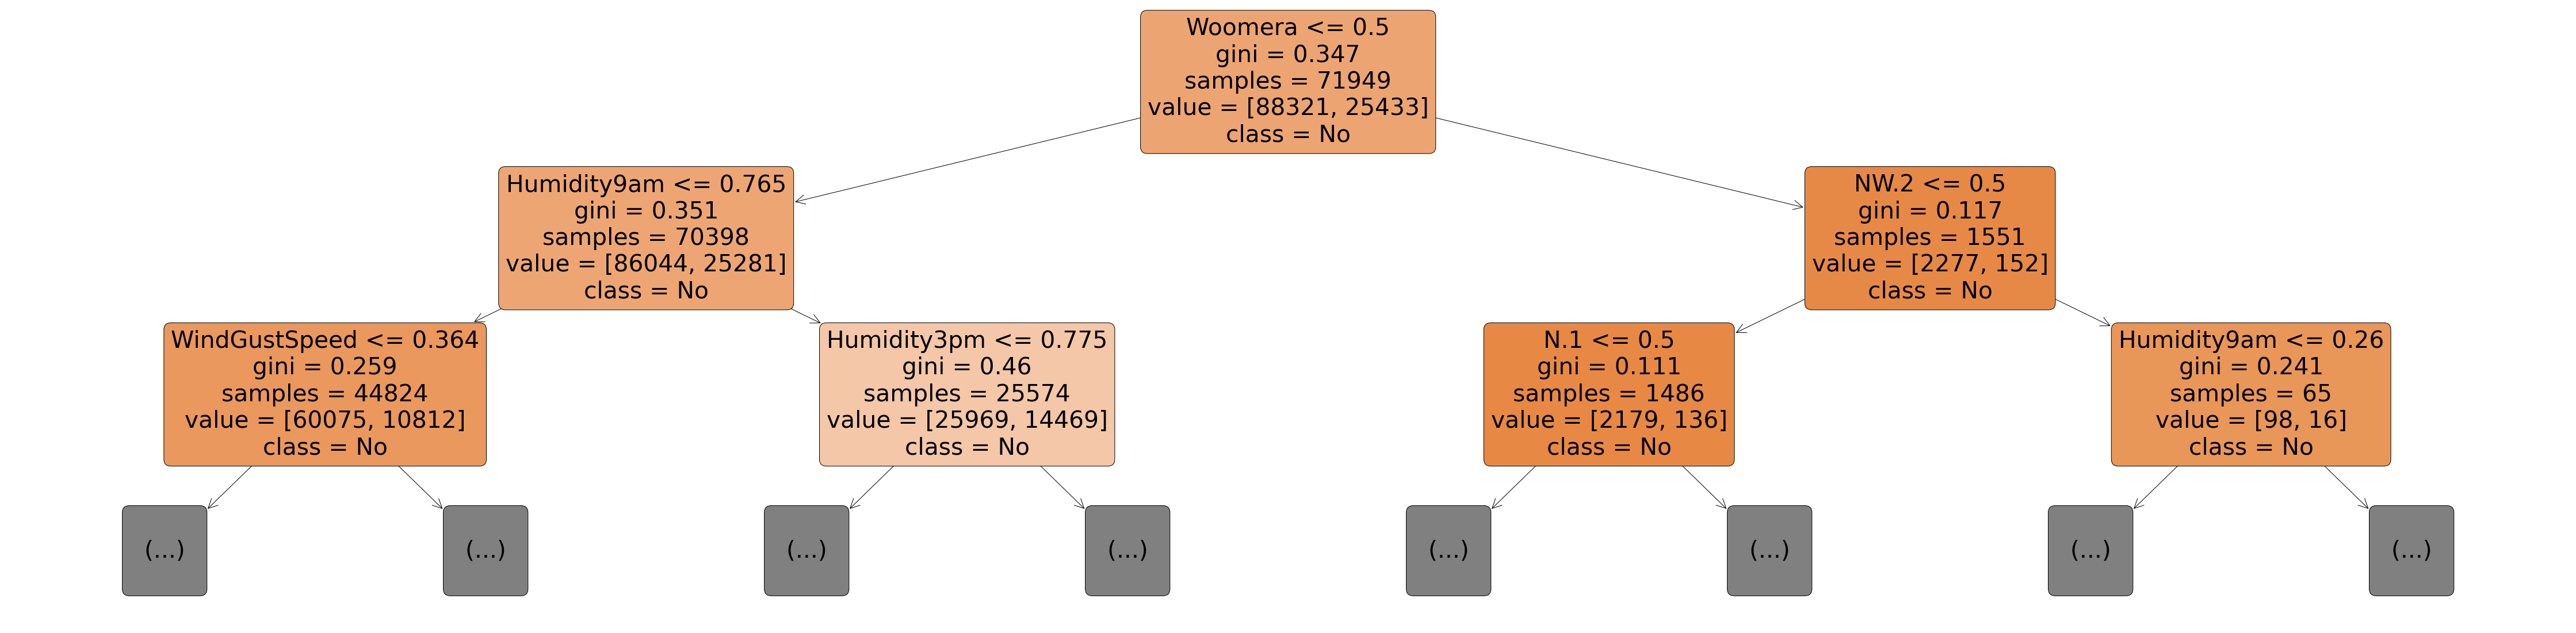

In [137]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [139]:
# Number of Decision tree created by Random forest
len(model.estimators_)

100

In [140]:
# important feature
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [143]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.135204
11,Pressure3pm,0.051484
4,Sunshine,0.049456
10,Pressure9am,0.048536
8,Humidity9am,0.048533
5,WindGustSpeed,0.046305
15,Temp3pm,0.043463
1,MaxTemp,0.040992
0,MinTemp,0.040367
14,Temp9am,0.038077


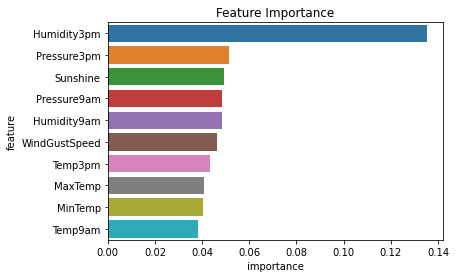

In [144]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Notice that the distribution is a lot less skewed than that for a single decision tree.

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 


In [146]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The nu

create a base model with which we can compare models with tuned hyperparameters.

In [147]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train);

ipykernel_launcher:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [148]:
base_train_acc = base_model.score(X_train, y_train)
base_val_acc = base_model.score(X_test, y_test)

In [149]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999472546020359, 0.8515418966911635)

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**10 estimators**

In [151]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [152]:
model.fit(X_train,y_train)

ipykernel_launcher:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [153]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9864883872215483, 0.8433840852350645)

In [154]:
base_accs

(0.9999472546020359, 0.8515418966911635)

**500 estimators**

In [155]:
model = RandomForestClassifier(random_state=42, n_jobs=10, n_estimators=500)

In [156]:
model.fit(X_train, y_train)

ipykernel_launcher:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(n_estimators=500, n_jobs=10, random_state=42)

In [157]:
model.score(X_train, y_train) , model.score(X_test, y_test)

(0.9999824182006787, 0.8535461865747741)

In [158]:
base_accs

(0.9999472546020359, 0.8515418966911635)

In [160]:
def n_estimators_error(md):
    model = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=md)
    model.fit(X_train, y_train)
    train_acc = 1 - model.score(X_train, y_train)
    val_acc = 1 - model.score(X_test, y_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Testing Error': val_acc}

In [162]:
#estimator_error_df = pd.DataFrame([n_estimators_error(md) for md in range(100,1000)]);


In [ ]:
estimator_error_df

In [ ]:
plt.figure()
plt.plot(n_estimators_error['Max Depth'], n_estimators_error['Training Error'])
plt.plot(n_estimators_error['Max Depth'], n_estimators_error['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Testing'])

define a helper function `test_params` to make it easy to test hyperparameters.

In [164]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

In [165]:
test_params(max_depth=5)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.8219491182727641, 0.8189106508667675)

In [166]:
test_params(max_depth=26)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9809677022346467, 0.8535110235943598)

In [167]:
test_params(max_leaf_nodes=2**5)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.8288939290046944, 0.8256267801258834)

In [168]:
test_params(max_leaf_nodes=2**20)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999648364013574, 0.8528077639860755)

In [169]:
base_accs # no max depth or max leaf nodes

(0.9999472546020359, 0.8515418966911635)

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

In [170]:
test_params(max_features='log2')


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999472546020359, 0.8517528745736489)

In [171]:
test_params(max_features=3)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999560455016966, 0.8478146207672562)

In [172]:
test_params(max_features=6)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999472546020359, 0.8517528745736489)

In [173]:
base_accs


(0.9999472546020359, 0.8515418966911635)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [174]:
test_params(min_samples_split=3, min_samples_leaf=2)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9647309105613868, 0.8523154822602764)

In [175]:
test_params(min_samples_split=100, min_samples_leaf=60)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.8490426710269529, 0.8416610991947677)

In [176]:
base_accs


(0.9999472546020359, 0.8515418966911635)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.



In [177]:
test_params(min_impurity_decrease=1e-7)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9997626457091618, 0.853370371672703)

In [180]:
test_params(min_impurity_decrease=1e-2)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.7755155862650984, 0.7770315411934315)

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [181]:
test_params(bootstrap=False)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999824182006787, 0.8566405288512254)

In [182]:
base_accs


(0.9999472546020359, 0.8515418966911635)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [185]:
test_params(max_samples=0.9,bootstrap=False)


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999824182006787, 0.8566405288512254)

In [186]:
base_accs

(0.9999472546020359, 0.8515418966911635)

### `class_weight`

In [187]:
model.classes_


array(['No', 'Yes'], dtype=object)

In [188]:
test_params(class_weight='balanced')


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999384637023753, 0.8517880375540631)

In [189]:
test_params(class_weight={'No': 1, 'Yes': 2})


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(0.9999560455016966, 0.851612222651992)

In [190]:
base_accs


(0.9999472546020359, 0.8515418966911635)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [191]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [192]:
model.fit(X_train, y_train)


ipykernel_launcher:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [193]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9917453452186297, 0.85192868947572)

In [194]:
base_accs

(0.9999472546020359, 0.8515418966911635)

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
model.feature_importances_

array([4.02517393e-02, 3.34497779e-02, 2.79553799e-02, 2.07806856e-02,
       4.26221764e-02, 6.11829126e-02, 2.54181020e-02, 2.96354050e-02,
       3.53424247e-02, 2.69666200e-01, 3.72940547e-02, 6.10977273e-02,
       1.34604220e-02, 1.59386745e-02, 3.53187899e-02, 3.42058757e-02,
       9.62068463e-03, 8.79175290e-03, 9.47387261e-03, 6.37918166e-04,
       1.15380531e-03, 1.85696110e-03, 1.36566530e-03, 1.39876779e-03,
       6.34645757e-04, 1.33450098e-03, 1.30769184e-03, 1.69360815e-03,
       1.69182029e-03, 8.19827033e-04, 1.62972608e-03, 1.04407427e-03,
       1.59222091e-03, 1.89154134e-03, 1.74532005e-04, 1.06011777e-03,
       1.87319186e-03, 8.02814649e-05, 1.03603322e-03, 1.41492699e-03,
       1.15967365e-03, 6.26057686e-04, 1.07435827e-03, 1.52345675e-03,
       1.60100231e-03, 6.24832380e-04, 8.66161672e-04, 2.17134920e-03,
       1.16774375e-03, 1.63919120e-03, 1.41979884e-03, 6.61941265e-04,
       1.16102301e-03, 1.67832492e-03, 1.60276639e-03, 1.61576141e-03,
      

turn this into a dataframe and visualize the most important features.

In [ ]:
important_df =pd.DataFrame({
    'feature':X_train.columns,
    'important':model.feature_importances_,
}).sort_values('important',ascending=False)
important_df

,feature,important
9,Humidity3pm,0.269666
5,WindGustSpeed,0.061183
11,Pressure3pm,0.061098
4,Sunshine,0.042622
0,MinTemp,0.040252
...,...,...
69,Woomera,0.000517
60,Townsville,0.000450
62,Uluru,0.000361
34,Darwin,0.000175


In [ ]:
important_df.head(10)

,feature,important
9,Humidity3pm,0.269666
5,WindGustSpeed,0.061183
11,Pressure3pm,0.061098
4,Sunshine,0.042622
0,MinTemp,0.040252
10,Pressure9am,0.037294
8,Humidity9am,0.035342
14,Temp9am,0.035319
15,Temp3pm,0.034206
1,MaxTemp,0.033450


<AxesSubplot:title={'center':'important feature'}, xlabel='important', ylabel='feature'>

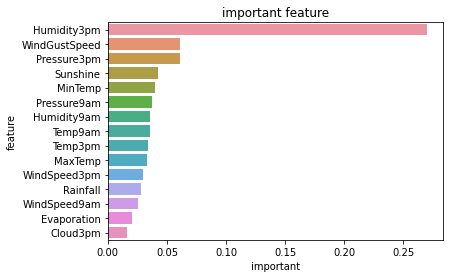

In [ ]:
# barplot of top 15 important feature
import seaborn as sns

plt.title('important feature')
sns.barplot(data=important_df.head(15),x='important',y='feature')

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [ ]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    al

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

In [ ]:
# model
model2 = DecisionTreeClassifier(max_depth=3,random_state=42)

In [ ]:
# fit the model
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and testing sets using `model.score`

In [ ]:
model2.score(X_train,y_train)

0.8290170015999437

In [ ]:
model2.score(X_test, y_test)

0.8271387882836949

while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

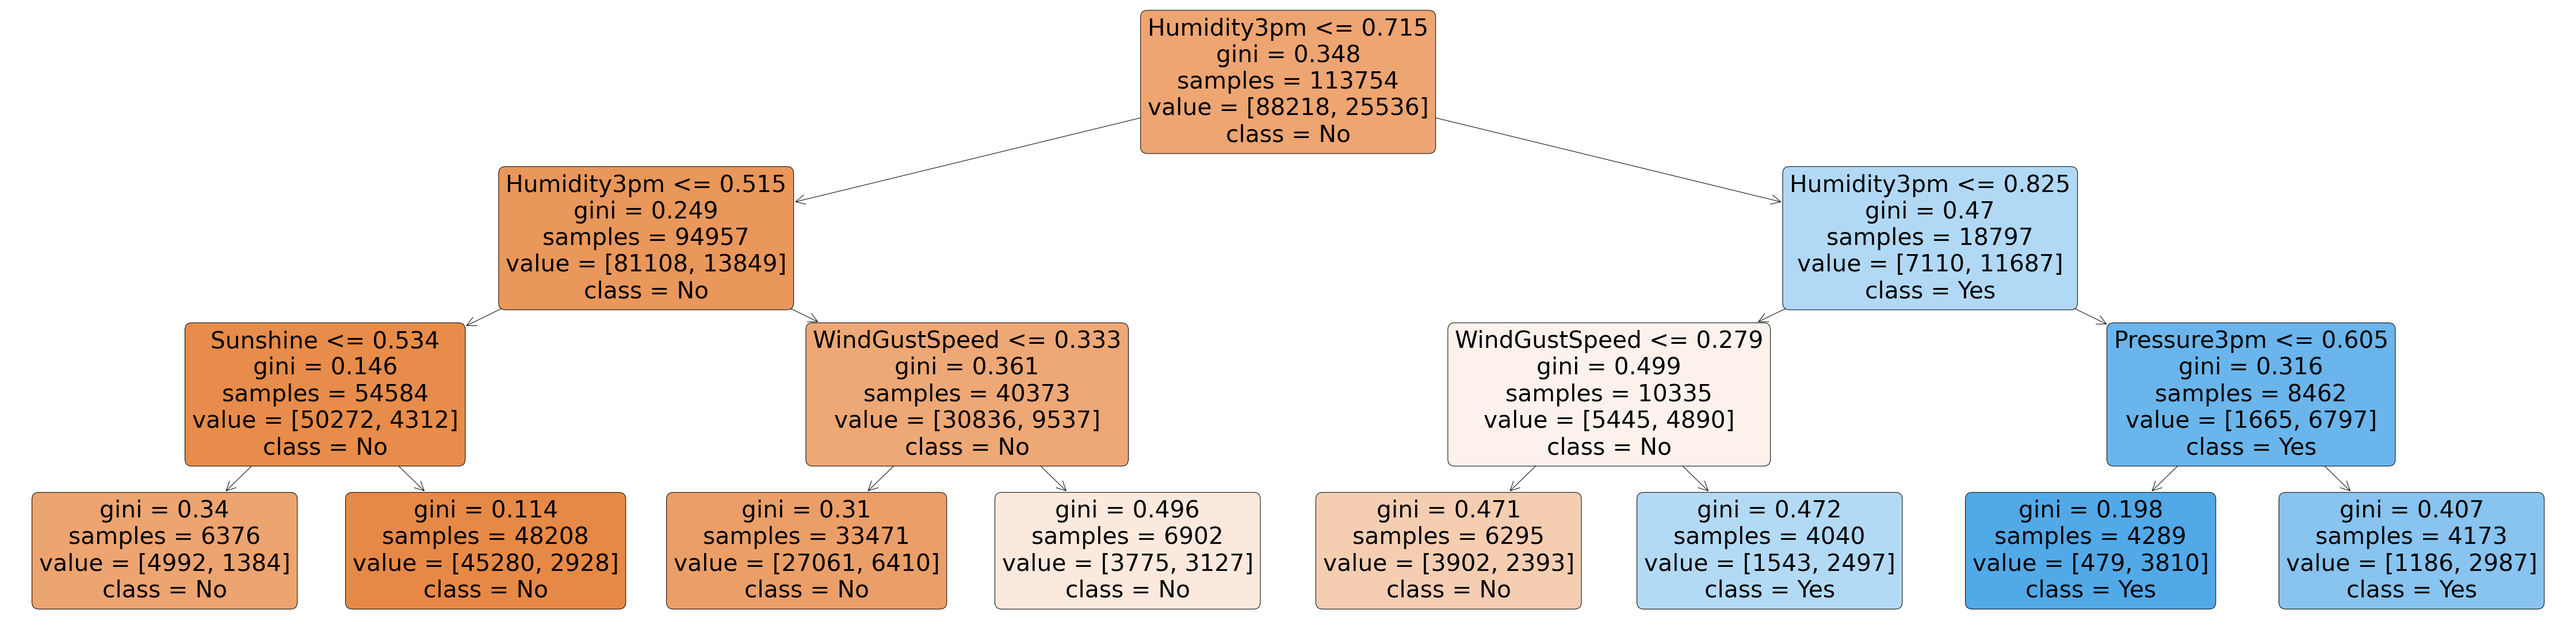

In [ ]:
# drawn tree
plt.figure(figsize=(80,20))
plot_tree(model2, feature_names=X_train.columns, class_names = model2.classes_, filled=True,rounded=True);

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))


|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.56
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- MinTemp <= 0.56
|   |   |   |   |   |   |--- Sunshine <= 0.13
|   |   |   |   |   |   |   |--- Humidity9am <= 0.46
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.26
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.26
|   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.61
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.53
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.53
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- Temp9am >  0.61
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Humidity9am >  0.46
|   |   |   |   |   |   |   |   |--- Evaporation <= 0.07


Let's experiment with different depths using a helper function.

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train,y_train)
    train_err = 1-model.score(X_train,y_train)
    test_err = 1-model.score(X_test,y_test)
    return {'Max Depth': md, 'Training Error': train_err, 'Testing Error': test_err}
    

In [ ]:
%%time 
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

Wall time: 35.4 s


In [ ]:
error_df

,Max Depth,Training Error,Testing Error
0,1,0.184248,0.187313
1,2,0.179370,0.180281
2,3,0.170983,0.172861
3,4,0.165533,0.169837
4,5,0.161128,0.164387
5,6,0.156997,0.163859
6,7,0.154122,0.162980
7,8,0.149630,0.162383
8,9,0.143635,0.161117
9,10,0.136848,0.160273


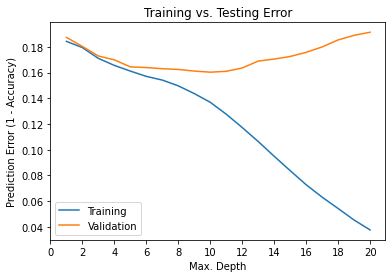

In [ ]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(range(0,21,2));
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])


You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 10 results in the lowest validation error.

In [ ]:
model = DecisionTreeClassifier(max_depth=10,random_state=42).fit(X_train,y_train)
model.score(X_test,y_test)

0.8397271352719856

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42).fit(X_train, y_train)

In [ ]:
model.score(X_train,y_train)

0.8474515181883714

In [ ]:
model.score(X_test,y_test)

0.8391293646049439

In [ ]:
model.tree_.max_depth

10

Notice that the model was able to achieve a greater depth of 10 for certain paths while keeping other paths shorter.

In [ ]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.56
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- MinTemp <= 0.56
|   |   |   |   |   |   |--- Sunshine <= 0.13
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.13
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- MinTemp >  0.56
|   |   |   |   |   |   |--- class: No
|   |   |   |   |--- WindGustSpeed >  0.36
|   |   |   |   |   |--- Humidity3pm <= 0.23
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.23
|   |   |   |   |   |   |--- Temp3pm <= 0.67
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.47
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.47
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Temp3pm >  0.67
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |--- Pressure3pm 